---

# Y.Afisha

 Y.Afisha, una aplicación que ayuda a los usuarios a encontrar y comprar billetes para eventos como proyecciones de películas, exhibiciones, conciertos, etcétera.
Desde el departamento analítico de Y.Afisha plantearon como objetivo general optimizar los gastos de marketing.
Contamos con los siguientes recursos de data: 
- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018.
- un archivo con los pedidos en el periodo.
- estadísticas de gastos de marketing.

Para desarrollar por completo el objetivo general, pasaremos por cada objetivos especificos: 
- cómo los clientes usan el servicio.
- cuándo empiezan a comprar.
- cuánto dinero aporta cada cliente a la compañía.
- cuándo los ingresos cubren el costo de adquisición de los clientes.

## Preprocesamiento de datos

In [134]:
#Importo librerias
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [135]:
#Descargo una parte de los datos para leer y optimizar posteriormente 
visits=pd.read_csv('/datasets/visits_log_us.csv', nrows=500)
orders=pd.read_csv('/datasets/orders_log_us.csv', nrows=500)
costs=pd.read_csv('/datasets/costs_us.csv', nrows=500)

In [136]:
#observo la informacion general de los dataframe
def mostrar_info(db):
    db.info()
    print('Duplicadas: ', db.duplicated(keep=False).sum())
    print('Valores faltantes: ', db.isnull().sum().sum())

In [137]:
#Obtención de información referente a la base de visitas
mostrar_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 19.7+ KB
Duplicadas:  0
Valores faltantes:  0


In [138]:
visits['Device'].nunique()

2

visits es una dataframe con 5 columnas, de las cuales dos de ella deberian estar en tipo fecha y la columna Device deberia ser tipo category por que solo tiene dos valores

In [139]:
#Obtención de información referente a la base de visitas
mostrar_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 11.8+ KB
Duplicadas:  0
Valores faltantes:  0


In [140]:
mostrar_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB
Duplicadas:  0
Valores faltantes:  0


In [141]:
#Descargo los datos completos y optimizados
visits=pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['End Ts', 'Start Ts'])
orders=pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
costs=pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [142]:
#convertir nombres de columnas
visits.columns=visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ','_')
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [143]:
#convertir nombres de columnas
orders.columns=orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ','_')
print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [144]:
#Eliminar sesiones que no tienen duración
visits = visits.loc[~(visits['start_ts']==visits['end_ts'])].reset_index(drop=True)

In [145]:
#observo cambios realizados 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323606 entries, 0 to 323605
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     323606 non-null  category      
 1   end_ts     323606 non-null  datetime64[ns]
 2   source_id  323606 non-null  int64         
 3   start_ts   323606 non-null  datetime64[ns]
 4   uid        323606 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 10.2 MB


In [146]:
visits.describe(include='all')

,device,end_ts,source_id,start_ts,uid
count,323606,323606,323606.000000,323606,3.236060e+05
unique,2,210175,NaN,209772,NaN
top,desktop,2017-11-24 16:51:00,NaN,2017-11-24 16:06:00,NaN
freq,238878,22,NaN,19,NaN
first,NaN,2017-06-01 00:02:00,NaN,2017-06-01 00:01:00,NaN
last,NaN,2018-06-01 01:26:00,NaN,2018-05-31 23:59:00,NaN
mean,NaN,NaN,3.732397,NaN,9.200878e+18
std,NaN,NaN,1.924799,NaN,5.295506e+18
min,NaN,NaN,1.000000,NaN,1.186350e+13
25%,NaN,NaN,3.000000,NaN,4.614964e+18


se observa que los clientes ingresan al visitio mayormente desde una computadora y que la fecha que mas visitas hay es el 24-11-2017

In [147]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [148]:
orders.describe(include='all')

,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
unique,45991,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
first,2017-06-01 00:10:00,NaN,NaN
last,2018-06-01 00:02:00,NaN,NaN
mean,NaN,4.999647,9.098161e+18
std,NaN,21.818359,5.285742e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.533567e+18


Se observa que el ingreso promedio por pedido es de 5 dolares, pero esta muy alejado del maximo de ingreso por pedido que se establece en 2633 dolares, lo cual se infiere la existencia de valores atípicos elevados. 
Y que el 31-05-2018 fue el dia que mas ventas se hicieron

In [149]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [150]:
costs.describe(include='all')

,source_id,dt,costs
count,2542.000000,2542,2542.000000
unique,NaN,364,NaN
top,NaN,2017-06-28 00:00:00,NaN
freq,NaN,7,NaN
first,NaN,2017-06-01 00:00:00,NaN
last,NaN,2018-05-31 00:00:00,NaN
mean,4.857199,NaN,129.477427
std,3.181581,NaN,156.296628
min,1.000000,NaN,0.540000
25%,2.000000,NaN,21.945000


Se puede observar que el costo promedio es de 129 dolares, siendo 1788 dolares el maximo de costos y 0.5 dolares el minimo de costos

## Análisis

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [151]:
#extraigo dia, semana y mes 
visits['start_day']=visits['start_ts'].astype('datetime64[D]')
visits['start_week']=visits['start_ts'].astype('datetime64[W]')
visits['start_month']=visits['start_ts'].astype('datetime64[M]')

In [152]:
persons_day= visits.groupby('start_day').agg({'uid':'nunique'})
persons_week= visits.groupby('start_week').agg({'uid':'nunique'})
persons_month= visits.groupby('start_month').agg({'uid':'nunique'})

Promedio de usuarios start_day: 817.5852


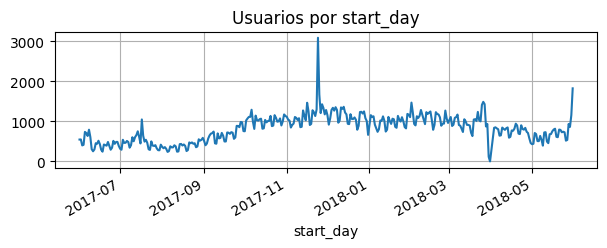

Promedio de usuarios start_week: 5155.5472


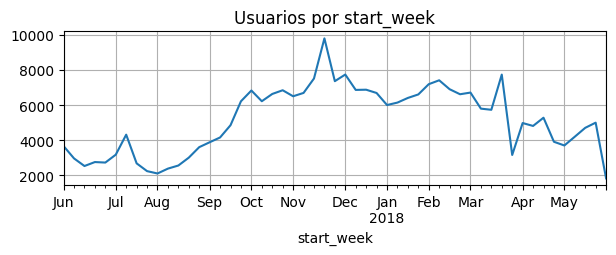

Promedio de usuarios start_month: 20955.75


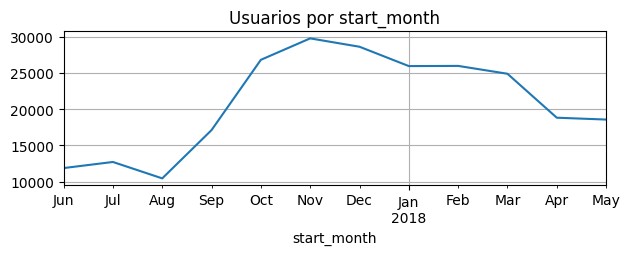

In [153]:
for cant in ['start_day','start_week','start_month']:
    tmp_data= visits.groupby(cant)['uid'].nunique()
    print(f"Promedio de usuarios {cant}: {round(tmp_data.mean(),4)}")
    plt.title(f'Usuarios por {cant}')
    tmp_data.plot(figsize=(7,2), grid=True)
    plt.show()

Los meses con las visitas al sitio de Y.Afisha son los últimos tres meses del año 2017 y los dos primeros meses del 2018, promediando 30302 visitas al sitio web. Semanalmente los resultados de mayores visitas al sitio web coinciden con los resultados mensuales Y.Afisha recibe 907 visitas diarias promedio y el día con mayores visitas fue el 24 de noviembre del 2017 con 3319 visitas.

#### ¿Cuántas sesiones hay por día?

En promedio hay 889.0274725274726 diarias


<AxesSubplot:title={'center':'Cantidad de sesiones por dia'}, xlabel='start_day'>

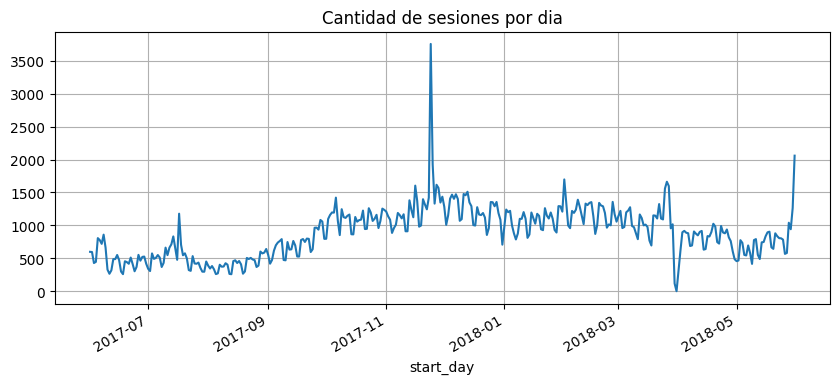

In [154]:
session_day=visits.groupby('start_day')['uid'].count()
print(f'En promedio hay', session_day.mean(),'diarias')
session_day.plot(kind='line', figsize=[10,4],grid=True, title='Cantidad de sesiones por dia')

In [155]:
mas_visits=session_day.sort_values().tail()
mas_visits

start_day
2018-03-26    1663
2018-02-01    1698
2017-11-25    1925
2018-05-31    2059
2017-11-24    3755
Name: uid, dtype: int64

En promedio hay 987 sesiones diarias en el sitio web.
Se puede observar que el 24 de noviembre de 2017, el sitio web obtuvo su records con 4042 sesiones

#### ¿Cuál es la duración de cada sesión?

In [156]:
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(f"Duracion promedio de sesion: {visits['duration_sec'].mean()} segundos")
print("Duracion promedio de sesion: 10,72 minutos")

Duracion promedio de sesion: 714.684622658418 segundos
Duracion promedio de sesion: 10,72 minutos


In [157]:
visits['duration_sec'].describe(percentiles=np.arange(0,1,0.1))

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
0%           19.000000
10%          60.000000
20%         120.000000
30%         180.000000
40%         240.000000
50%         360.000000
60%         540.000000
70%         780.000000
80%        1140.000000
90%        1680.000000
max       84480.000000
Name: duration_sec, dtype: float64

<AxesSubplot:ylabel='Frequency'>

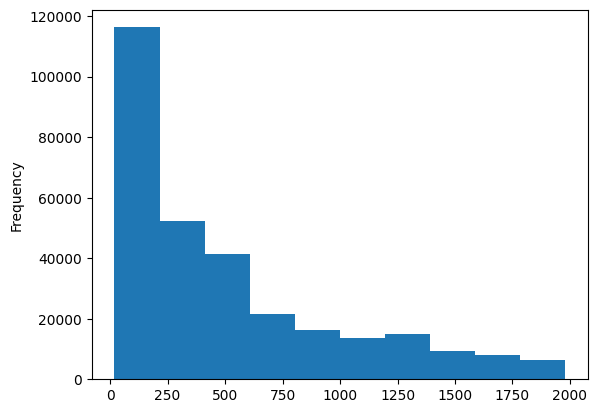

In [158]:
visits.query('duration_sec <= 2000')['duration_sec'].plot(kind='hist')

Según los cálculos con la data entregada un sesión máxima dura 23 horas pero esto puede ser un error por lo tanto, se calcularon más percentiles para una mejor grafica y obtuvieron las siguientes conclusiones:
El 90% de las sesiones duran 27 minutos y en promedio las sesiones duran 10 minutos aproximadamente. En el histograma se puede observar claramente un sesgo positivo, indicando que entre más largas son las sesiones, son mucho menos frecuentes.

Sesión promedio en segundos por dispositivo:
    device  duration_sec
0  desktop    773.755834
1    touch    548.142125

Sesión promedio en segundos por fuente:
   source_id  duration_sec
0          1   1103.217881
1          2    925.520084
2          3    640.841131
3          4    626.963332
4          5    592.098219
5          6   1644.000000
6          7    624.000000
7          9    634.529215
8         10    740.274217


<AxesSubplot:title={'center':'Segundos promedios de sesión por fuente'}, xlabel='source_id'>

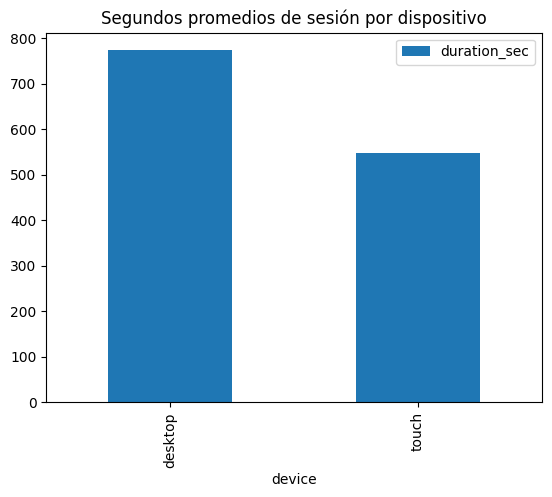

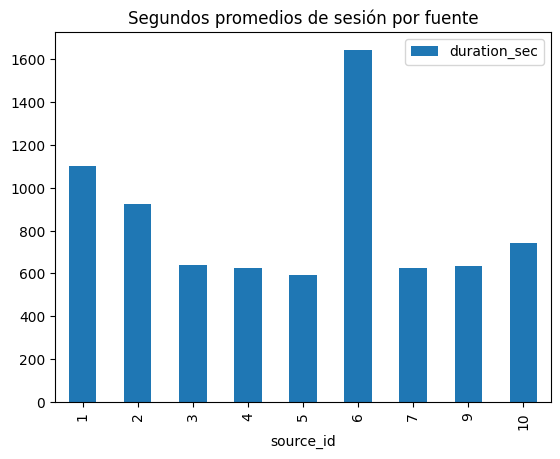

In [159]:
durat_disp = visits.groupby('device').agg({'duration_sec':'mean'}).reset_index()
durat_fuente = visits.groupby('source_id').agg({'duration_sec':'mean'}).reset_index()

print('Sesión promedio en segundos por dispositivo:')
print(durat_disp)
durat_disp.plot(x='device',
            kind='bar',
            stacked=False,
            title='Segundos promedios de sesión por dispositivo')
print()
print('Sesión promedio en segundos por fuente:')
print(durat_fuente)
durat_fuente.plot(x='source_id',
            kind='bar',
            stacked=False,
            title='Segundos promedios de sesión por fuente')

Al observar se concluye que los usuarios desde el desktop tienen sesiones mas duraderas que por un dispositivo touch.

Y respecto a las fuentes, los usuarios que se mantienen con mayor tiempo el sitio web es mediante la fuente 6, seguida de la fuente numero 1

#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [160]:
dau_total = visits.groupby('start_day').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby('start_week').agg({'uid': 'nunique'}).mean()

print('DAU =',int(dau_total))
print('WAU =',int(wau_total))

DAU = 817
WAU = 5155


In [161]:
sf=dau_total/wau_total
print('Factor de adherencia', sf)

Factor de adherencia uid    0.158584
dtype: float64


Un sticky factor es comparable en el tiempo, este numero por si solo, no se puede interpretar sin tener un historial de sticky factor de otros periodos

### Ventas

Primeras observaciones sobre la salud financiera de Y.Afisha

In [162]:
ingresos=orders['revenue'].sum()
print('Ingresos bruto total desde junio 2017 a mayo 2018:', ingresos.round())

Ingresos bruto total desde junio 2017 a mayo 2018: 252057.0


In [163]:
costos=costs['costs'].sum()
print('Costos totales desde junio 2017 a mayo 2018:', costos.round())

Costos totales desde junio 2017 a mayo 2018: 329132.0


In [164]:
beneficio_bruto = ingresos - costos
beneficio_bruto
#beneficio bruto negativo

-77074.42000000001

In [165]:
margen_bruto= beneficio_bruto / ingresos
margen_bruto*100

-30.57814654768839

#### ¿Cuándo la gente empieza a comprar?

In [166]:
primera_visita = visits.groupby('uid')['start_ts'].min().reset_index()
#primera_visita['vmonth'] = primera_visita['Start Ts'].dt.month #para ver si compra el mismo dia de la visita
primera_compra = orders.groupby('uid')['buy_ts'].min().reset_index()

join = primera_visita.merge(primera_compra, on=['uid'])

In [167]:

join['buy_ts']=pd.to_datetime(join['buy_ts'])
join['start_ts']=pd.to_datetime(join['start_ts'])

#hago una difencia entre las fechas de la primera sesion y la primera compra
join['tiempodecompra'] = join['buy_ts'] - join['start_ts']  
#Formo un cohorte deacuerdo al tiempo que se demoran los usuarios en realizar la primera compra desde la primera visita
cohorte= join.groupby('tiempodecompra').agg({'uid':'nunique'})
print(cohorte.sort_values(by='uid').tail(5)) #ordeno y muestro las ultimas 5 filas 
print()
print(join['tiempodecompra'].mean())
print()
print(join['tiempodecompra'].mode())

                  uid
tiempodecompra       
0 days 00:04:00  1491
0 days 00:03:00  1714
0 days 00:02:00  2146
0 days 00:00:00  2318
0 days 00:01:00  2724

15 days 10:43:00.661844184

0   0 days 00:01:00
dtype: timedelta64[ns]


En promedio la gente comienza a comprar 15 dias despues de su primera visita

Y la mayoria de las personas compran el mismo dia de haber iniciado sesion en la plataforma

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [168]:
orders['order_day']=orders['buy_ts'].astype('datetime64[D]')
orders['order_week']=orders['buy_ts'].astype('datetime64[W]')
orders['order_month']=orders['buy_ts'].astype('datetime64[M]')

Promedio de pedidos order_day: 127.8791


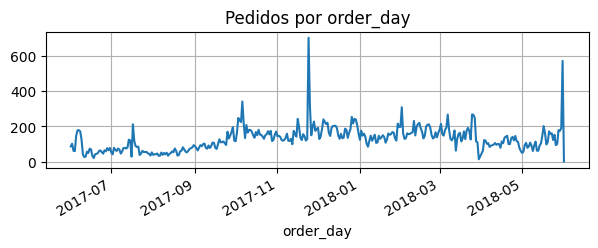

Promedio de pedidos order_week: 818.0943


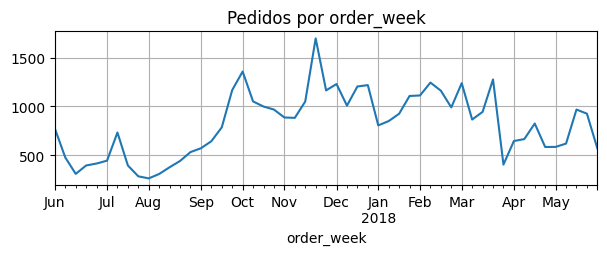

Promedio de pedidos order_month: 3155.3077


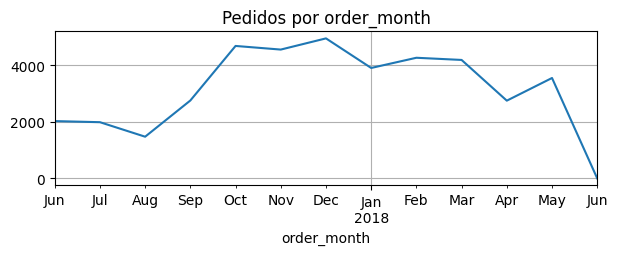

In [169]:
for cant in ['order_day','order_week','order_month']:
    tmp_data= orders.groupby(cant)['uid'].nunique()
    print(f"Promedio de pedidos {cant}: {round(tmp_data.mean(),4)}")
    plt.title(f'Pedidos por {cant}')
    tmp_data.plot(figsize=(7,2), grid=True)
    plt.show()

o	Cantidad de perdidos: 

o	Diario: 127 pedidos

o	Semanal: 818 pedidos

o	Mensual: 3155

o	En general se puede observar que los meses con mayores pedidos son desde octubre 2017 a marzo 2018

#### ¿Cuál es el tamaño promedio de compra?

In [170]:
tamaño= orders.groupby('order_month')['revenue'].mean()
print('El tamaño promedio de compra es $',round(tamaño.mean(),2))

El tamaño promedio de compra es $ 4.84


In [171]:
#primera_compra
primera_compra.columns =['uid', 'first_order_date']
orders = orders.merge(primera_compra,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [172]:
tamaño_compra= orders.pivot_table(index='first_order_month',columns='order_month',values='revenue',aggfunc='mean')

<AxesSubplot:title={'center':'Mapa de calor de tamaño promedio de compra mensual'}, xlabel='order_month', ylabel='first_order_month'>

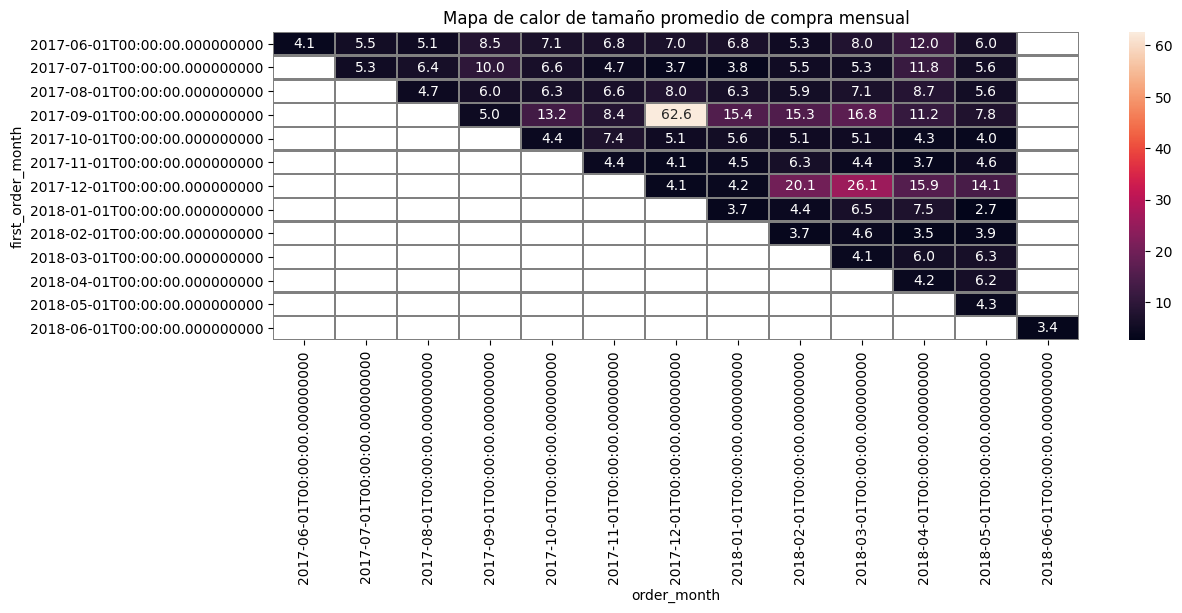

In [173]:
plt.figure(figsize=(13, 4))
plt.title('Mapa de calor de tamaño promedio de compra mensual')
sns.heatmap(tamaño_compra, annot=True,fmt='.1f',linewidths=1,linecolor='gray')

#### ¿Cuánto dinero traen? (LTV)

In [174]:
#Recupero el mes de la primera compra de cada cliente
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [251]:
#Calcular el número de nuevos clientes (n_buyers) para cada mes
#cuantos clientes hicieron su primera compra el mes 1, 2, 3 etc 
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [176]:
#agrupo la tabla de pedidos por mes de la primera compra, mes de analisis y totalizo los ingresos
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [252]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [242]:
margin_rate = 0.5

report['bbr'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [179]:
report['ltv'] = report['bbr'] / report['n_buyers']

In [180]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2).cumsum(axis=1)
#output.fillna('')

<AxesSubplot:title={'center':'Mapa de calor de LTV por cohorte'}, xlabel='age', ylabel='first_order_month'>

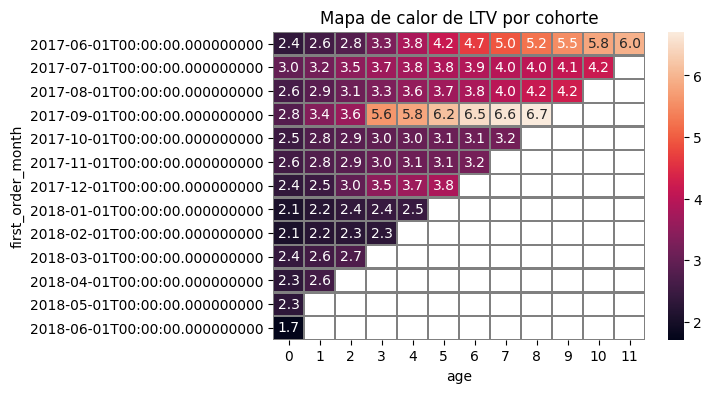

In [181]:
plt.figure(figsize=(6, 4))
plt.title('Mapa de calor de LTV por cohorte')
sns.heatmap(output, annot=True,fmt='.1f',linewidths=1,linecolor='gray')

In [182]:
ltv_201706 = output.loc['2017-06-01'].sum()
print(f'En promedio, cada cliente de la primera cohorte generó', ltv_201706,'durante su ciclo de vida') 

En promedio, cada cliente de la primera cohorte generó 51.21 durante su ciclo de vida


### Marketing

convertir a un visitante en un comprador


conversion = (compr/vistis) *100%

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

[Text(0.5, 1.0, 'COSTOS MENSUALES')]

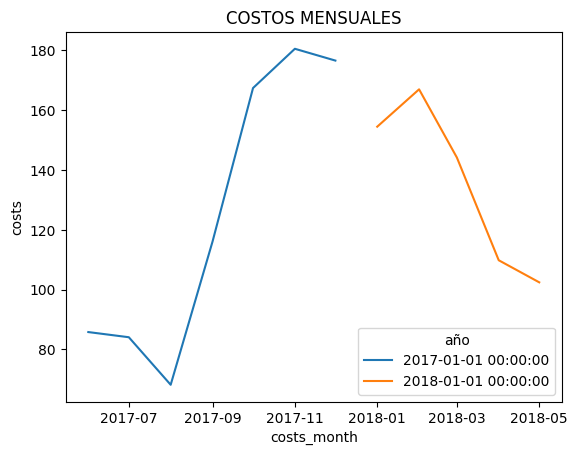

In [183]:
costs['costs_month']= costs['dt'].astype('datetime64[M]')
costs['año']= costs['dt'].astype('datetime64[Y]')
sns.lineplot(data=costs, x="costs_month", y="costs", hue="año", ci=None).set(title='COSTOS MENSUALES')

In [184]:
foryear=costs.groupby('año')['costs'].sum()
foryear

año
2017-01-01    187961.15
2018-01-01    141170.47
Name: costs, dtype: float64

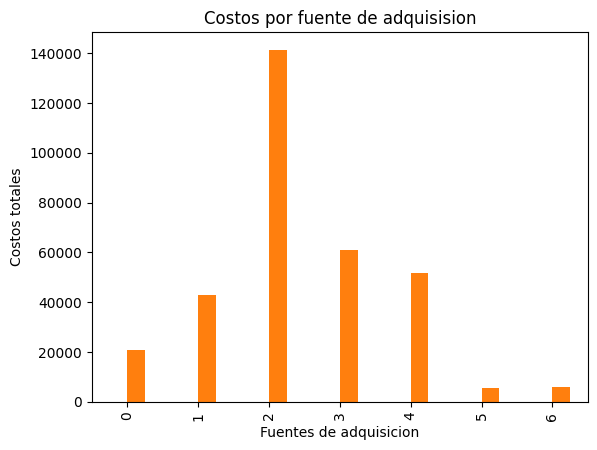

In [185]:
porfuente = costs.groupby('source_id')['costs'].sum().reset_index()
porfuente.plot(kind='bar', 
               title='Costos por fuente de adquisision', 
               xlabel='Fuentes de adquisicion', 
               ylabel= 'Costos totales',
              legend=False)
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [186]:
# Primera visita usuarios
first_visit_users = (visits[['uid','start_ts','source_id']]
    .sort_values(by='start_ts',ascending=True)
    .groupby('uid',as_index=False)
    .first())
first_visit_users['first_visit_date'] = first_visit_users['start_ts'].dt.date

In [187]:
# Primera orden usuarios
first_order_users = (orders[['uid','buy_ts']]
    .sort_values(by='buy_ts',ascending=True)
    .groupby('uid',as_index=False)
    .first())
first_order_users['first_buy_date'] = first_order_users['buy_ts'].dt.date

In [188]:
# Primera visita y orden de usuarios
first_data_users = pd.merge(first_visit_users[['uid','source_id','first_visit_date']],
                            first_order_users[['uid','first_buy_date']],on='uid')

In [189]:
# Agrupar por fuente y fecha para contar cantidad diferente de compradores
first_date_buyers =(first_data_users 
    .groupby(['source_id','first_visit_date'])
    .agg(n_buyers=('uid','nunique'))
    .reset_index()) 
first_date_buyers['first_visit_date'] = pd.to_datetime(first_date_buyers['first_visit_date'])

In [190]:
# Unir costos por fecha y fuente
cac_buyers = pd.merge(first_date_buyers,costs,left_on=['source_id','first_visit_date'],right_on=['source_id','dt'])

In [191]:
# Calcular cac diario de cada fuente
cac_buyers['cac_diario']=cac_buyers['costs']/cac_buyers['n_buyers']

In [241]:
# calcular promedio de cac por fuente
print('EL COSTO PROMEDIO DE ADQUISION DE CLIENTES POR',cac_buyers.groupby('source_id')['cac_diario'].mean())

EL COSTO PROMEDIO DE ADQUISION DE CLIENTES POR source_id
1      8.822139
2     16.353129
3     15.487632
4      6.962589
5      8.659545
9      6.998745
10     6.582339
Name: cac_diario, dtype: float64


Los clientes mas caros de adquirir son por las fuentes 2 y 3

#### ¿Cuán rentables eran las inversiones? (ROMI)

In [193]:
 # Primera visita usuarios
first_visit_users = (
    visits[['uid','start_ts','source_id']]
    .sort_values(by='start_ts',ascending=True)
    .groupby('uid',as_index=False)
    .head(1)
)
# Mes de primera visita usuarios
first_visit_users['first_visit_month'] = first_visit_users['start_ts'].astype('datetime64[M]')

In [207]:
# Primera orden usuarios
first_order_users = (
    orders[['uid','buy_ts']]
    .sort_values(by='buy_ts',ascending=True)
    .groupby('uid',as_index=False)
    .head(1))

# Mes de primera orden usuarios
first_order_users['first_order_month'] = first_order_users['buy_ts'].astype('datetime64[M]')


In [197]:
# Seleccionar columnas a usar de visitas
first_visit_users = first_visit_users[['uid','source_id','first_visit_month']]

# Unir data de primera orden a dataframe orders
orders_source = pd.merge(orders,first_visit_users[['first_visit_month','uid','source_id']],on='uid')

In [233]:
# Seleccionar columnas a usar de ordenes
buyers = orders_source[['uid','first_order_month','revenue','order_month']]
buyers['age']= ((buyers['order_month'].dt.month) - (buyers['first_order_month'].dt.month))
buyers['age']+= 12*((buyers['order_month'].dt.year) - (buyers['first_order_month'].dt.year))

/tmp/ipykernel_123/13720951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyers['age']= ((buyers['order_month'].dt.month) - (buyers['first_order_month'].dt.month))
/tmp/ipykernel_123/13720951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyers['age']+= 12*((buyers['order_month'].dt.year) - (buyers['first_order_month'].dt.year))


In [232]:
# Unir data de ordenes con data de visitas
buyers_s = pd.merge(buyers,first_visit_users,on='uid')

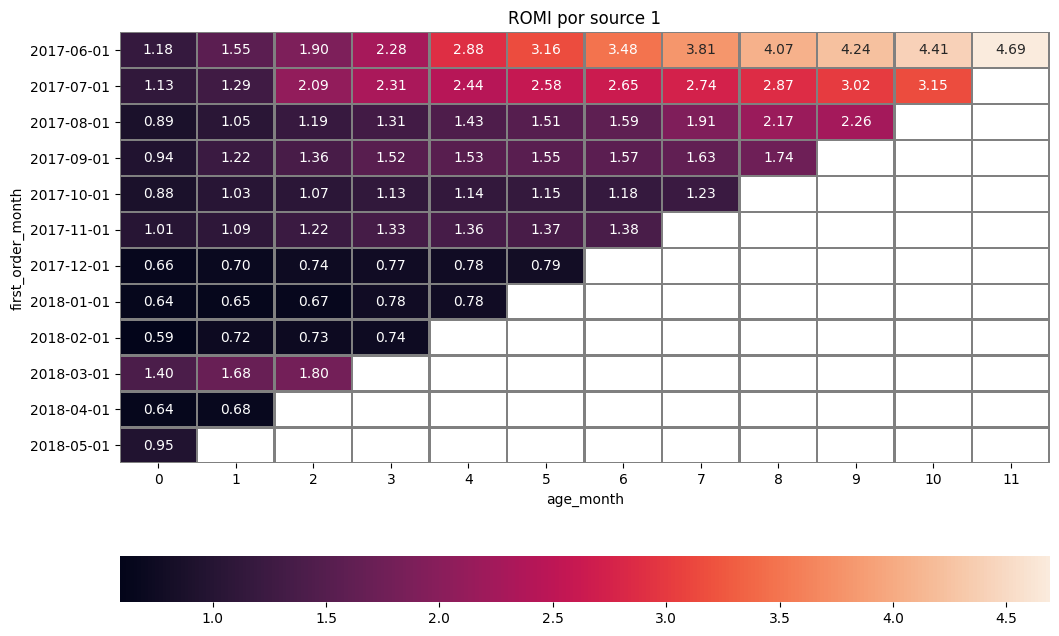

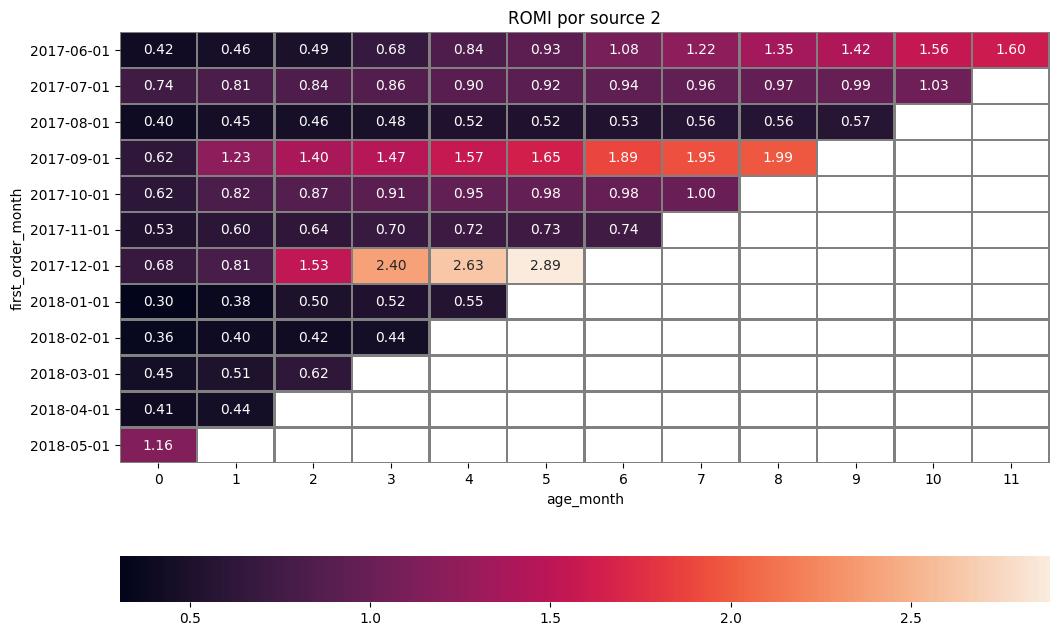

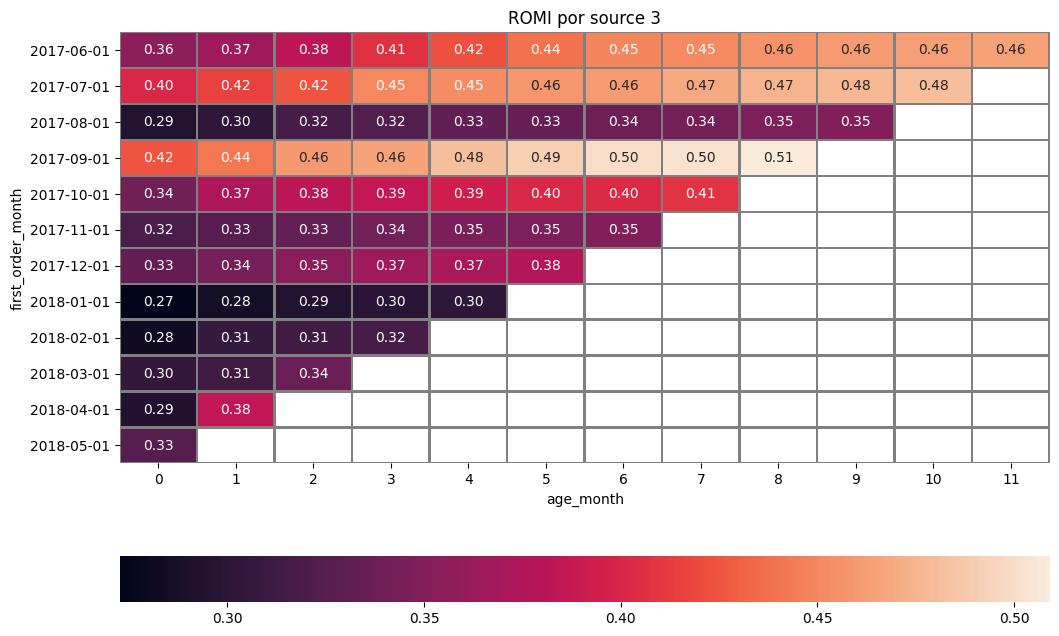

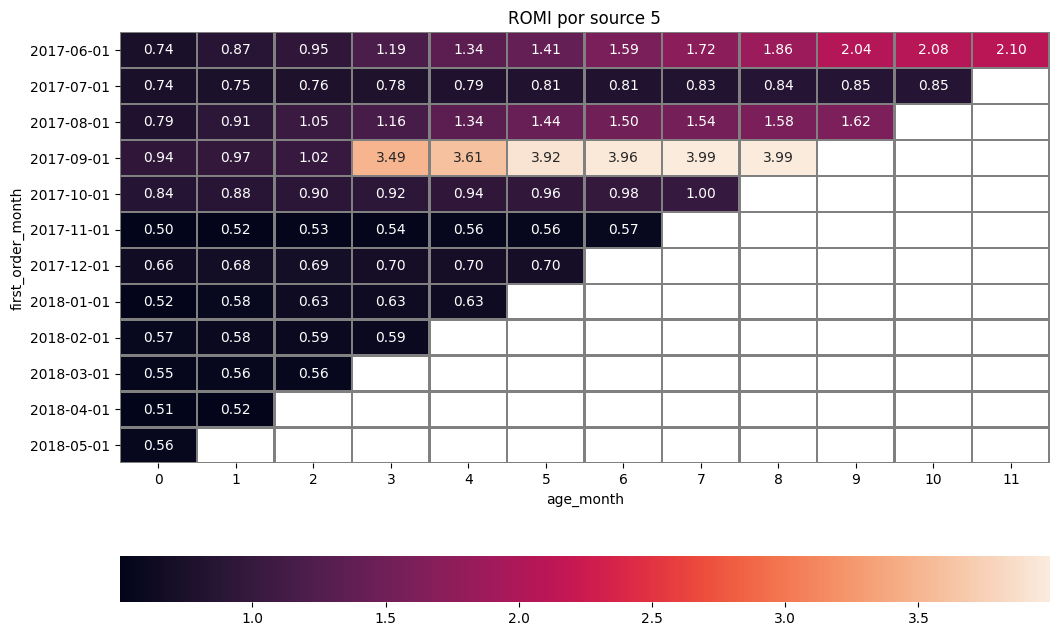

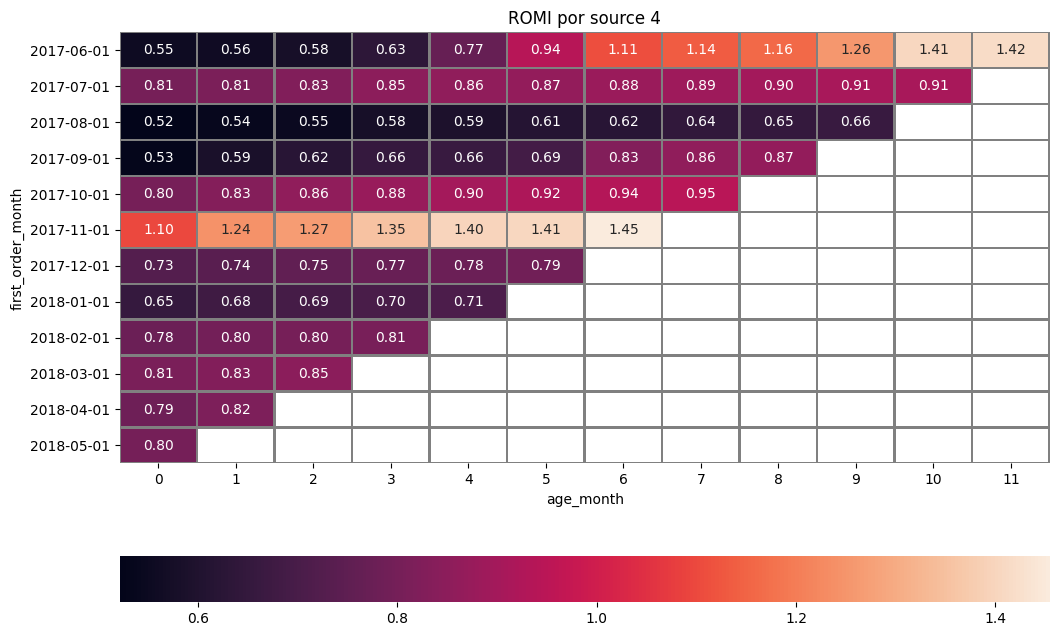

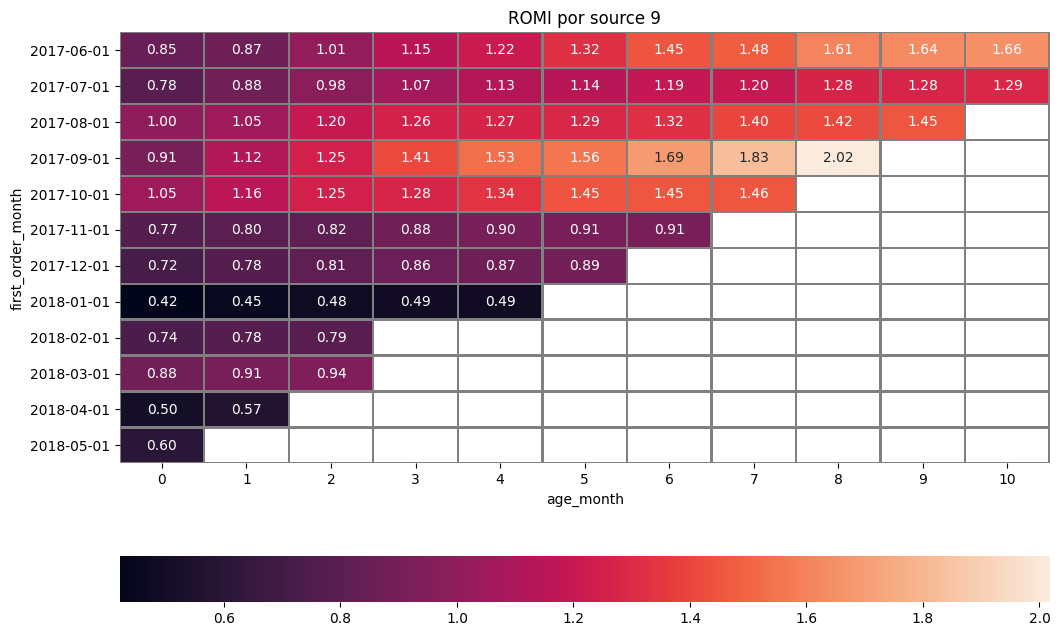

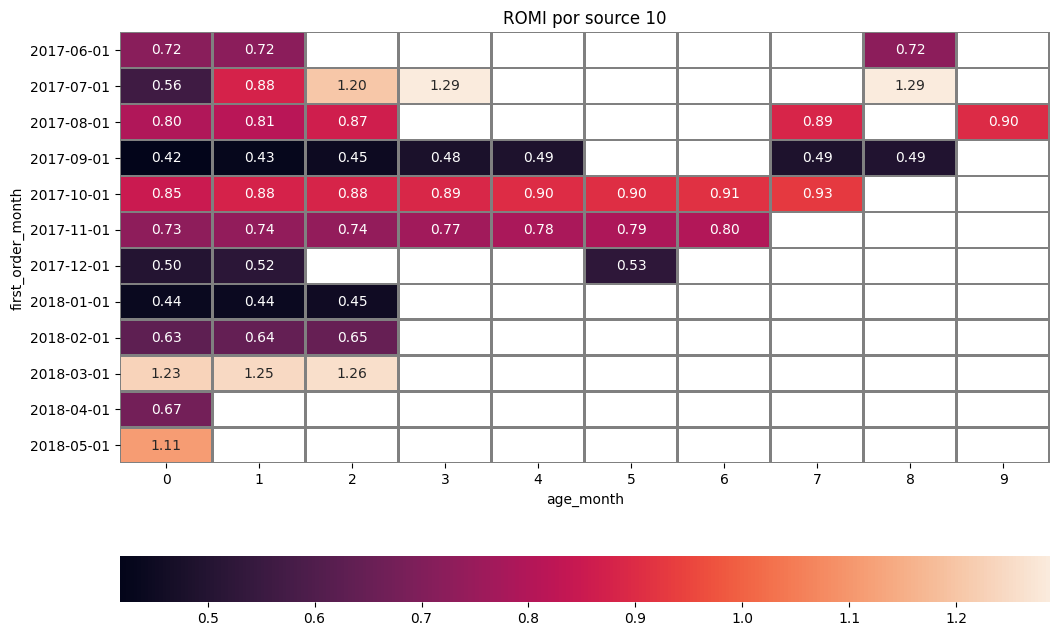

In [243]:
for source_id in buyers_s[buyers_s['source_id'].notna()]['source_id'].unique():
    source_df=buyers_s.query(f'source_id == {source_id}')
    costs_df= costs.query(f'source_id == {source_id}')
    cohorts_revenue_month = (source_df.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
    cohorts_revenue_month['age_month'] = ((pd.to_datetime(cohorts_revenue_month['order_month']) 
                                           - pd.to_datetime(cohorts_revenue_month['first_order_month']))
                                          /np.timedelta64(1,'M')).round().astype(int)
    cohort_sizes = (source_df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index().rename(columns={'uid': 'n_buyers'}, inplace=False))
    monthly_costs = (costs_df.groupby(['costs_month']).agg({'costs':'sum'}).reset_index())
    cohorts_report = pd.merge(cohort_sizes, cohorts_revenue_month, on = 'first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
    cohorts_report = pd.merge(cohorts_report,
                          monthly_costs,
                          left_on='first_order_month',
                          right_on='costs_month'
                             ) 
    cohorts_report.drop(['costs_month'], axis=1, inplace=True)
    cohorts_report['cac']=cohorts_report['costs']/cohorts_report['n_buyers']
    cohorts_report['romi']=cohorts_report['rev_per_buyer']/cohorts_report['cac']
    romi = (
    cohorts_report
    .pivot_table(index='first_order_month', columns='age_month', values='romi', aggfunc='mean')
    .cumsum(axis=1))
    romi.round(2).fillna('')
    romi.index=romi.index.astype(str)
    if len(romi) > 0:
        plt.figure(figsize=(12, 8))
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROMI por source {}'.format(source_id))
        plt.show()

La inversion en las fuentes 1 y 5 son mas rentables. 

## Conclusion general
Tras realizar inicialmente una evaluación, se pudo observar que existe una gran diferencia en comportamientos de antidad de pedidos pedidos entre octubre 2017 a marzo 2018, es muy importante colocar los mayores recursos en estos meses y para obtener mejores ganancias del aumento del consumo de los clientes. Respecto a los dispositivos, es interesante, quienes usan desktop, tienen niveles de gastos mayores, esto se deberia a que la existencia de incentivos visuales en los dispositivos desktop están teniendo un muy buen efecto.

Tambien se pudo analizar gracias a las gráficas es que, aunque los ingresos de los primeros meses son menores a los posteriores, los clientes visitan y gastan cada vez menos. Es necesario llevar a cabo estrategias de retención de clientes, que evite la persistencia de este fenómeno.

Posteriormente realizando un análisis sobre los gastos de marketing, pudimos confirmar que aunque la fuente 2 y 3 son las mas caras, no obstante, la fuente 2 sigue siendo rentable donde tambien el tiempo de rentencion en la plataforma es mayor, junto a la fuente 1 y 5. Es recomendable no seguir invirtiendo en la fuente 3 y 10 ya que no entregan gran rentabilidad.

En Y.afisha los gastos aumentaron, al igual que el número de nuevos clientes, no obstante, se obtienen más ingresos en a partir de octubre hasta marzo. Pero tarda cuatro meses en empezar a compensar, por lo que los beneficios aún no han seguido el ritmo de los gastos.